# Lab | model generation and valiation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#download the data
data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
print("downloaded")

downloaded


In [3]:
data.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# %load "cleaning_column_names.py"
#cleaning column Names 

import numpy as np
import pandas as pd 

def to_lower_case(df: pd.DataFrame) -> pd.DataFrame:

	'''
	This changes columns in lower case 

	Input: 
	df:pd.DataFrame

	Ourput: 
	Another pd.DataFrame


	'''

	df2 = df.copy()

	cols = []
	for colname in df2.columns:
		cols.append(colname.lower())

	df2.columns = cols

	
	return df2


def column_name(df: pd.DataFrame) -> pd.DataFrame:


	'''
	Regarding column name, this replaces 'customer' of a column name with 'id', and '(space)' with '_'.   

	Input: 
	df:df.DataFrame

	Ourput: 
	Another df.DataFrame


	'''

	df2 = df.copy()
	#replace 'customer' with 'id'
	if 'customer' in df2.columns:

		df2 = df2.rename(columns={'customer':'id'})

	#replace '(space)' with '_'
	df2.columns = df2.columns.str.replace(' ', '_')

	return df2



def cleaning_column_names(df: pd.DataFrame) -> pd.DataFrame:


	'''
	This cleans column names by using two functions above.

	Input: 
	df:pd.DataFrame

	Ourput: 
	Another pd.DataFrame


	'''

	df2 = df.copy()

	df2 = to_lower_case(df2)
	df2 = column_name(df2)

	print('finished cleaning_column_names')

	return df2
	





In [6]:
 # Clean the column names and check
%run -i cleaning_column_names.py

data = cleaning_column_names(data)

finished cleaning_column_names


1 Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity (see the previous lab)

In [7]:
data.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [8]:
correlation_matrix = data.corr()

# Select the columns that are correlated with total_claim_amount
correlated_cols = correlation_matrix[abs(correlation_matrix['total_claim_amount']) > 0.75].index

# Remove columns that suffer from multicollinearity
selected_cols = []
for col in correlated_cols:
    if col != 'total_claim_amount':
        if all(abs(correlation_matrix.loc[selected_col, 'total_claim_amount']) < 0.75 for selected_col in selected_cols):
            selected_cols.append(col)

selected_data = data[selected_cols]
print(selected_data.columns)

Index([], dtype='object')


There is no correlated columns with total_claim_amount at the ratio 0.75. Therefore, there is no multicollinearity. 'monthly_premium_auto' was selected becase it has the highest correlation. 

2.Remove outliers

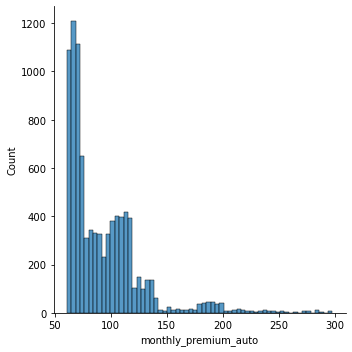

In [9]:

sns.displot(data['monthly_premium_auto']) #sns.displot(data=data, x='HV1')
plt.show()

In [10]:
#compute the skewness of this column using:
data['monthly_premium_auto'].skew()


2.1235464499475345

which is outside the [-2,2] range.

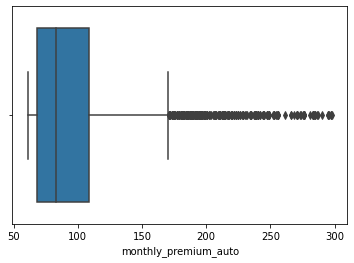

In [11]:
#check by boxplot
sns.boxplot(x=data['monthly_premium_auto'])
plt.show()

In [12]:
# removing the outliers from monthly_premium_auto 

iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) #blue box
upper_wisker = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
lower_wisker = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr

In [13]:
lower_wisker

6.5

In [14]:
upper_wisker

170.5

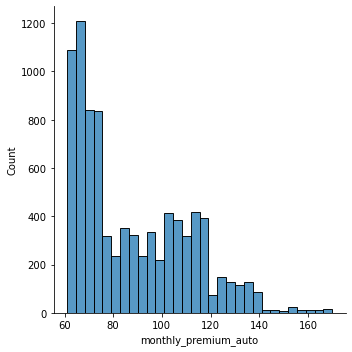

In [15]:
data = data[(data['monthly_premium_auto']>lower_wisker) & (data['monthly_premium_auto']<upper_wisker)]
sns.displot(data['monthly_premium_auto'])
plt.show()

4. X-y split. (define which column you want to predict, and which ones you will use to make the prediction)

In [16]:
#separate the features from the labels
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


5. Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any integer number of your choice).

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,8704.0,7577.478745,6192.134004,1898.007675,3873.647046,5597.12496,8659.357603,57520.501510
income,8704.0,37669.705882,30463.877452,0.000000,0.000000,33806.00000,62399.250000,99981.000000
monthly_premium_auto,8704.0,87.591567,22.885502,61.000000,68.000000,80.00000,106.000000,170.000000
months_since_last_claim,8704.0,15.084444,10.058778,0.000000,6.000000,14.00000,23.000000,35.000000
months_since_policy_inception,8704.0,47.946921,27.941271,0.000000,24.000000,48.00000,71.000000,99.000000
number_of_open_complaints,8704.0,0.383272,0.910786,0.000000,0.000000,0.00000,0.000000,5.000000
number_of_policies,8704.0,2.965763,2.386184,1.000000,1.000000,2.00000,4.000000,9.000000
total_claim_amount,8704.0,402.705849,235.308985,0.099007,261.930545,369.60000,528.000000,1985.999807


In [18]:
data.shape

(8704, 24)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

6. Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns).

In [20]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [21]:
display(len(X_train_df))
display(len(X_test_df))

6963

1741

7.Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().

In [22]:
# Divide categorical features and numerical ones
X_train_df_num = X_train_df.select_dtypes(include = np.number)
X_train_df_cat = X_train_df.select_dtypes(include = object)

X_test_df_num = X_test_df.select_dtypes(include = np.number)
X_test_df_cat = X_test_df.select_dtypes(include = object)

8. If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()

In [23]:
X_train_df_num.skew()

customer_lifetime_value          2.704704
income                           0.279685
monthly_premium_auto             0.761342
months_since_last_claim          0.288459
months_since_policy_inception    0.038598
number_of_open_complaints        2.782952
number_of_policies               1.260332
dtype: float64

In [24]:
X_train_df_num['number_of_open_complaints'].unique()

array([2, 0, 4, 1, 5, 3])

The 'customer_lifetime_value' and 'number_of_open_complaints' are skewed. So 'customer_lifetime_value' are transformed, while 'number_of_open_complaints' is remained because the unique values are only 5.  

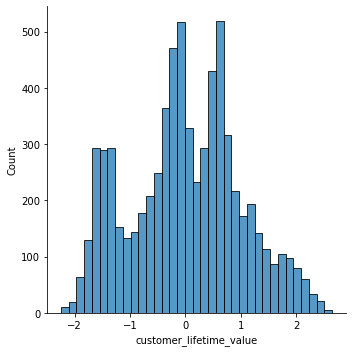

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() 
pt.fit(X_train_df_num[['customer_lifetime_value']] )
X_train_df_num['customer_lifetime_value'] = pt.transform(X_train_df_num[['customer_lifetime_value']])

X_test_df_num['customer_lifetime_value'] = pt.transform(X_test_df_num[['customer_lifetime_value']])


sns.displot(X_train_df_num['customer_lifetime_value'])
plt.show()


In [28]:
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_train_df_num) # fit() Determine the min and the max of each column in the TRAIN set



X_train_scaled = scaler.transform(X_train_df_num) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler.transform(X_test_df_num) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_df_num.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_train_df_num.columns)

X_train_scaled_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.949037,0.466052,0.532110,0.971429,0.747475,0.4,0.125
1,0.569877,0.000000,0.467890,0.342857,0.939394,0.0,0.250
2,0.205168,0.644561,0.119266,0.542857,0.494949,0.0,0.000
3,0.448955,0.759926,0.073394,0.114286,0.232323,0.0,0.750
4,0.455429,0.000000,0.844037,0.714286,0.050505,0.0,0.000


9.Save all your transformers/scalers right after the .fit() using pickle using the code shown below

In [29]:
import os
import pickle

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler3.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
  pickle.dump(scaler, file) # Replace "variable" with the name of the variable that contains your transformer



10.If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() function.

In [30]:
X_train_transformed_df = pd.DataFrame(X_train_scaled_df, columns=X_train_df_num.columns)
X_test_transformed_df  = pd.DataFrame(X_test_scaled_df,  columns=X_train_df_num.columns)

X_test_transformed_df.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.101245,0.215724,0.000000,0.314286,0.616162,0.0,0.000
1,0.805670,0.637799,0.009174,0.800000,0.404040,0.0,0.125


11. Transform the categorical columns into numbers

In [31]:
X_train_df_cat.head(1)

,id,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8879,MN83273,California,Yes,Premium,High School or Below,1/31/11,Employed,F,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Call Center,Four-Door Car,Medsize


In [32]:
X_train_df_cat['response'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

In [34]:
# Select the "gender" column
multiple_column_train = X_train_df_cat[['state', 'response', 'employmentstatus','gender', 'marital_status', 'policy_type', 'sales_channel']]
multiple_column_test = X_test_df_cat[['state', 'response', 'employmentstatus','gender', 'marital_status', 'policy_type', 'sales_channel']]


# Initialize the OneHotEncoder
encoder = OneHotEncoder()


# Fit and transform the gender column
encoder.fit(multiple_column_train)

encoded_data_test = encoder.fit_transform(multiple_column_test)
encoded_data_train = encoder.fit_transform(multiple_column_train)

# Convert the encoded data to a DataFrame
encoded_df_train = pd.DataFrame(encoded_data_train.toarray(), columns=encoder.get_feature_names(['state', 'response', 'employmentstatus','gender', 'marital_status', 'policy_type', 'sales_channel']))
encoded_df_test = pd.DataFrame(encoded_data_test.toarray(), columns=encoder.get_feature_names(['state', 'response', 'employmentstatus','gender', 'marital_status', 'policy_type', 'sales_channel']))

# Print the encoded DataFrame
encoded_df_test.head()

/Users/soichirotanabe/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/soichirotanabe/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
#save 
path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "categorical_nomina13.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
   pickle.dump(OneHotEncoder, file) # Replace "variable" with the name of the variable that contains your transformer


In [36]:
#categorical ordinal column
#change 'education'
X_train_df_cat['education'].unique()

array(['High School or Below', 'Bachelor', 'College', 'Doctor', 'Master'],
      dtype=object)

In [37]:
edu = {'High School or Below': 1, 'Bachelor' : 2, 'College' : 3, 'Doctor': 4, 'Master' : 5}
X_train_df_cat["education"] = X_train_df_cat["education"].apply(lambda x: edu[x] )

X_test_df_cat["education"] = X_test_df_cat["education"].apply(lambda x: edu[x] )

#X_train_df_cat["education"].head(3)

In [38]:
X_train_df_cat["education"].info

<bound method Series.info of 8879    1
5515    1
6487    2
7702    3
4016    1
       ..
8673    3
6527    3
8738    5
6568    3
5886    1
Name: education, Length: 6963, dtype: int64>

In [39]:
#change vehicle_class
X_train_df_cat['vehicle_class'].unique()

array(['Four-Door Car', 'Sports Car', 'Two-Door Car', 'SUV'], dtype=object)

In [40]:
V_class = {'Four-Door Car' : 2, 'Sports Car': 4, 'Two-Door Car' : 1, 'SUV': 3}
X_train_df_cat["vehicle_class"] = X_train_df_cat["vehicle_class"].apply(lambda x: V_class[x] )
X_test_df_cat["vehicle_class"] = X_test_df_cat["vehicle_class"].apply(lambda x: V_class[x] )

X_train_df_cat["vehicle_class"].unique()

array([2, 4, 1, 3])

In [41]:
#change vehicle_size
X_train_df_cat['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [42]:
V_size = {'Medsize' : 2, 'Small': 1, 'Large' : 3}
X_train_df_cat["vehicle_size"] = X_train_df_cat["vehicle_size"].apply(lambda x: V_size[x] )
X_test_df_cat["vehicle_size"] = X_test_df_cat["vehicle_size"].apply(lambda x: V_size[x] )

X_train_df_cat["vehicle_size"].unique()

array([2, 1, 3])

12. Concat numerical_transformer and categorical_transfomed DataFrames using pd.concat().

In [43]:
#check
len(X_train_df_num)

6963

In [44]:
num_without_index_train = X_train_transformed_df.reset_index(drop=True)
num_without_index_test = X_test_transformed_df.reset_index(drop=True)

In [45]:
cat_without_index_train = encoded_df_train.reset_index(drop=True)
cat_without_index_test = encoded_df_test.reset_index(drop=True)

In [46]:
Size = X_train_df_cat["vehicle_size"].reset_index(drop=True)
Class = X_train_df_cat["vehicle_class"].reset_index(drop=True)
Education = X_train_df_cat["education"].reset_index(drop=True)

Size_test = X_test_df_cat["vehicle_size"].reset_index(drop=True)
Class_test = X_test_df_cat["vehicle_class"].reset_index(drop=True)
Education_test = X_test_df_cat["education"].reset_index(drop=True)

In [48]:
new_transformed_train = pd.concat([num_without_index_train, cat_without_index_train, Size, Class, Education],axis=1)
new_transformed_test = pd.concat([num_without_index_test, cat_without_index_test, Size_test, Class_test, Education_test],axis=1)

display(new_transformed_train.head(2))
display(new_transformed_test.head(2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size,vehicle_class,education
0,0.949037,0.466052,0.53211,0.971429,0.747475,0.4,0.125,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,2,1
1,0.569877,0.000000,0.46789,0.342857,0.939394,0.0,0.250,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,4,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size,vehicle_class,education
0,0.101245,0.215724,0.000000,0.314286,0.616162,0.0,0.000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,3
1,0.805670,0.637799,0.009174,0.800000,0.404040,0.0,0.125,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,3


In [49]:
new_transformed_test.shape

(1741, 34)

12. Apply another MinMaxScaler to the concatenated DataFrame.

In [50]:
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler8 = MinMaxScaler()
#scaler7 = MinMaxScaler()

scaler8.fit(new_transformed_train) # fit() Determine the min and the max of each column in the TRAIN set
#scaler7.fit(X_test_df_num)


X_train_scaled8 = scaler8.transform(new_transformed_train) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled8  = scaler8.transform(new_transformed_test) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df8 = pd.DataFrame(X_train_scaled8, columns=new_transformed_train.columns)
X_test_scaled_df8  = pd.DataFrame(X_test_scaled8,  columns=new_transformed_test.columns)

display(X_train_scaled_df8.head(2))
display(X_test_scaled_df8.head(2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size,vehicle_class,education
0,0.949037,0.466052,0.53211,0.971429,0.747475,0.4,0.125,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.333333,0.0
1,0.569877,0.000000,0.46789,0.342857,0.939394,0.0,0.250,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.000000,0.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size,vehicle_class,education
0,0.101245,0.215724,0.000000,0.314286,0.616162,0.0,0.000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5
1,0.805670,0.637799,0.009174,0.800000,0.404040,0.0,0.125,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.5


13. Save all your MinMaxScaler right after the .fit() using pickle using the code shown below

In [51]:
path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "MinMaxScalar10.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
   pickle.dump(scaler8, file) # Replace "variable" with the name of the variable that contains your transformer

14. Apply linear regression to the Pandas DataFrame obtained in the previous step using sklearn

In [52]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df8, y_train)

LinearRegression()

15.save your linear model right after the .fit() using pickle

In [53]:
path = "models/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_regression6.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer

Model Validation

Compute the following metrics for your Train and Test sets:

Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.

In [54]:
X_test_scaled_df8.shape

(1741, 34)

In [55]:
y_train_pred = linear_model.predict(X_train_scaled_df8)
y_test_pred  = linear_model.predict(X_test_scaled_df8)

In [56]:
display(len(y_train_pred))
display(len(y_test_pred))

6963

1741

In [57]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,571.200000,518.500
1,Train,537.600000,656.125
2,Train,48.181699,243.125
3,Train,102.147789,175.500
4,Train,1027.000029,886.875


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes the real values and any model predictions for the Train and Test sets and returns a Pandas
    DataFrame with a summary of error metrics for the Train and Test sets like this:

    | Metric | Train | Test |
    |--------|-------|------|
    | MAE    | value | value|
    | MSE    | value | value|
    | RMSE   | value | value|
    | R2     | value | value|

    Inputs:
    y_real_train: Python list with the real values to be predicted in the Train set
    y_real_train: Python list with the real values to be predicted in the Train set
    y_pred_train: Python list with the model's predicted values in the Train set
    y_pred_test:  Python list with the model's predicted values in the Train set
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test,  y_pred_test,  squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test,  y_pred_test)

    results = {"Metric": ["MAE","MSE", "RMSE", "R2"], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [59]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,129.68,128.35
1,MSE,29830.54,29312.00
2,RMSE,172.72,171.21
3,R2,0.47,0.45
